In [2]:
!pip install tensorflow

  Using cached tensorflow-2.12.0-cp310-cp310-win_amd64.whl (1.9 kB)
  Using cached tensorflow_intel-2.12.0-cp310-cp310-win_amd64.whl (272.8 MB)
  Using cached gast-0.4.0-py3-none-any.whl (9.8 kB)
  Using cached absl_py-1.4.0-py3-none-any.whl (126 kB)
  Using cached keras-2.12.0-py2.py3-none-any.whl (1.7 MB)
  Using cached google_pasta-0.2.0-py3-none-any.whl (57 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
     ---------------------------------------- 4.2/4.2 MB 11.7 MB/s eta 0:00:00
  Using cached tensorboard-2.12.3-py3-none-any.whl (5.6 MB)
     ---------------------------------------- 1.3/1.3 MB 14.0 MB/s eta 0:00:00
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
     ------------------

In [3]:
from tensorflow.keras.datasets import mnist
(x_train,y_train),(x_test,y_test) = mnist.load_data()

11490434/11490434 [==============================] - 2s 0us/step


In [4]:
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [5]:
print(x_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

In [6]:
print(x_train.shape[0])
print(x_test.shape[0])

60000
10000


In [7]:
#We have to reshape the images by adding the number of channels.⁸
#RGB means 3 channels and B&W means 1 channel
#The images in the MNIST dataset are stored as B&W which contains 1 channel
x_train = x_train.reshape(60000,28,28,1)
x_test = x_test.reshape(10000,28,28,1)

In [8]:
print(x_train)

[[[[0]
   [0]
   [0]
   ...
   [0]
   [0]
   [0]]

  [[0]
   [0]
   [0]
   ...
   [0]
   [0]
   [0]]

  [[0]
   [0]
   [0]
   ...
   [0]
   [0]
   [0]]

  ...

  [[0]
   [0]
   [0]
   ...
   [0]
   [0]
   [0]]

  [[0]
   [0]
   [0]
   ...
   [0]
   [0]
   [0]]

  [[0]
   [0]
   [0]
   ...
   [0]
   [0]
   [0]]]


 [[[0]
   [0]
   [0]
   ...
   [0]
   [0]
   [0]]

  [[0]
   [0]
   [0]
   ...
   [0]
   [0]
   [0]]

  [[0]
   [0]
   [0]
   ...
   [0]
   [0]
   [0]]

  ...

  [[0]
   [0]
   [0]
   ...
   [0]
   [0]
   [0]]

  [[0]
   [0]
   [0]
   ...
   [0]
   [0]
   [0]]

  [[0]
   [0]
   [0]
   ...
   [0]
   [0]
   [0]]]


 [[[0]
   [0]
   [0]
   ...
   [0]
   [0]
   [0]]

  [[0]
   [0]
   [0]
   ...
   [0]
   [0]
   [0]]

  [[0]
   [0]
   [0]
   ...
   [0]
   [0]
   [0]]

  ...

  [[0]
   [0]
   [0]
   ...
   [0]
   [0]
   [0]]

  [[0]
   [0]
   [0]
   ...
   [0]
   [0]
   [0]]

  [[0]
   [0]
   [0]
   ...
   [0]
   [0]
   [0]]]


 ...


 [[[0]
   [0]
   [0]
   ...
   [0]
   [0]
   [0]

In [9]:
#The y_train and y_test data represent the class to which the images belong. This can be 0 to 9
#In case of MNIST dataset, we have to convert this y_train and y_test data to categorical variables.
#This can be done by using to_categorical() method of 'utils' module

from tensorflow.keras import utils
y_train = utils.to_categorical(y_train,10)
y_test = utils.to_categorical(y_test,10)

In [10]:
print(y_train.shape)
print(y_test.shape)

(60000, 10)
(10000, 10)


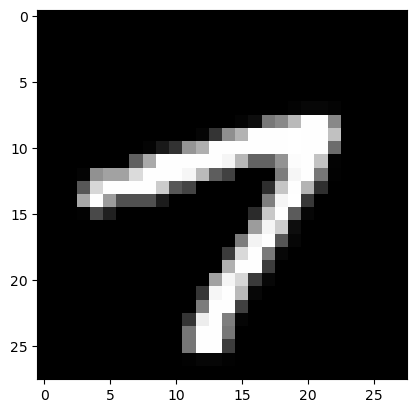

In [11]:
import matplotlib.pyplot as plt
plt.imshow(x_train[101],cmap='gray')

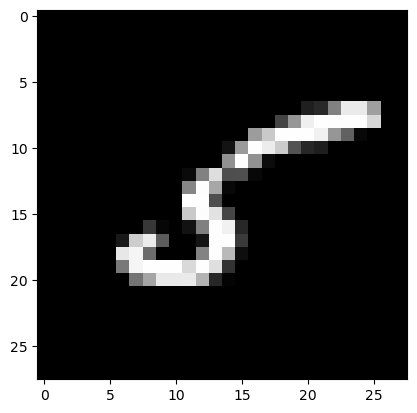

In [12]:
import matplotlib.pyplot as plt
plt.imshow(x_train[11],cmap='gray')

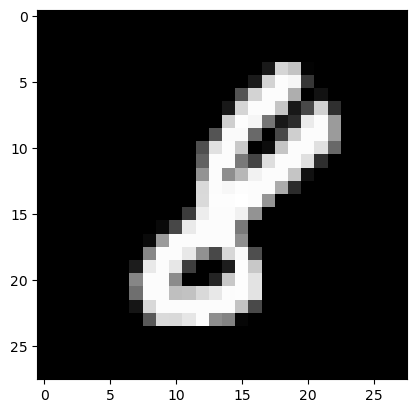

In [13]:
import matplotlib.pyplot as plt
plt.imshow(x_train[10001],cmap='gray')

In [14]:
arr1=y_train[101]
print(arr1)
arr2=y_train[11]
print(arr2)
arr3=y_train[10001]
print(arr3)

[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]


In [15]:
import numpy as np
label1=np.argmax(arr1)
print(label1)
label2=np.argmax(arr2)
print(label2)
label3=np.argmax(arr3)
print(label3)

7
5
8


In [16]:
#Build CNN model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D

In [17]:
model=Sequential()
input_layer=Dense(32,input_shape=(28,28,1))
model.add(input_layer)

In [18]:
conv_layer1 = Conv2D(32,kernel_size=(3,3),activation='relu')
model.add(conv_layer1)

In [19]:
conv_layer2 = Conv2D(32,kernel_size=(3,3),activation='relu')
model.add(conv_layer2)

In [20]:
pool_layer=MaxPooling2D(pool_size=(2,2))
model.add(pool_layer)

In [21]:
drop_layer=Dropout(0.5)
model.add(drop_layer)

In [22]:
flat_layer=Flatten()
model.add(flat_layer)

In [23]:
output_layer=Dense(10,activation='softmax')
model.add(output_layer)

In [24]:
#Compile the Model
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [25]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 28, 28, 32)        64        
                                                                 
 conv2d (Conv2D)             (None, 26, 26, 32)        9248      
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 12, 12, 32)        0         
                                                                 
 flatten (Flatten)           (None, 4608)              0         
                                                        

In [26]:
#Train the Model
history=model.fit(x_train,y_train,batch_size=32,epochs=5,verbose=1,validation_data=(x_test,y_test))

Epoch 1/5
1875/1875 [==============================] - 125s 66ms/step - loss: 0.3391 - accuracy: 0.9206 - val_loss: 0.0808 - val_accuracy: 0.9774
Epoch 2/5
1875/1875 [==============================] - 120s 64ms/step - loss: 0.1158 - accuracy: 0.9657 - val_loss: 0.0809 - val_accuracy: 0.9758
Epoch 3/5
1875/1875 [==============================] - 120s 64ms/step - loss: 0.0911 - accuracy: 0.9723 - val_loss: 0.0542 - val_accuracy: 0.9842
Epoch 4/5
1875/1875 [==============================] - 127s 68ms/step - loss: 0.0742 - accuracy: 0.9770 - val_loss: 0.0532 - val_accuracy: 0.9829
Epoch 5/5
1875/1875 [==============================] - 121s 65ms/step - loss: 0.0607 - accuracy: 0.9813 - val_loss: 0.0516 - val_accuracy: 0.9849


In [27]:
#Evaluate the model
val_loss,val_acc = model.evaluate(x_test,y_test)
print(val_loss)
print(val_acc)

313/313 [==============================] - 3s 8ms/step - loss: 0.0516 - accuracy: 0.9849
0.05163711681962013
0.9848999977111816


In [28]:
arr4=model.predict([x_train[100].reshape(1,28,28,1)])
labelx=np.argmax(arr4)
print(labelx)
arr5=model.predict([x_train[10].reshape(1,28,28,1)])
labely=np.argmax(arr5)
print(labely)
arr6=model.predict([x_train[10000].reshape(1,28,28,1)])
labelz=np.argmax(arr6)
print(labelz)

1/1 [==============================] - 0s 116ms/step
5
1/1 [==============================] - 0s 20ms/step
3
1/1 [==============================] - 0s 18ms/step
3
